In [2]:
import pandas as pd
import numpy as np
import math
data_1 = pd.read_csv('./dataset/state of the union 2018.csv') 
print(data_1.shape)
data_2 = pd.read_csv('./dataset/state-of-the-union-trump_2019-02-05-225820-8225-0-0-0.64kmono.csv') 
print(data_2.shape)

(6101, 2)
(5815, 2)


In [9]:
from tqdm.auto import tqdm, trange

df = pd.DataFrame(columns=[
    'filename',
    'Number_c_2b', 
    'Word_c_2b',
    'Number_c_1b', 
    'Word_c_1b',
    'Number', 
    'Word', 
    'Number_c_1f', 
    'Word_c_1f',
    'Number_c_2f', 
    'Word_c_2f',
])
for index, rows in tqdm(data_1.iterrows(), total=data_1.shape[0] ):
    if index <2:
        continue
    elif index>6098:
        continue
    else:
        df_new = pd.DataFrame({
            "filename": "f1",
            "Number_c_2b":[data_1.loc[index-2, 'Number']],
            "Word_c_2b":[data_1.loc[index-2, 'Word']],
            "Number_c_1b":[data_1.loc[index-1, 'Number']],
            "Word_c_1b":[data_1.loc[index-1, 'Word']],
            "Number":[data_1.loc[index, 'Number']],
            "Word":[data_1.loc[index, 'Word']],
            "Number_c_1f":[data_1.loc[index+1, 'Number']],
            "Word_c_1f":[data_1.loc[index+1, 'Word']],
            "Number_c_2f":[data_1.loc[index+2, 'Number']],
            "Word_c_2f":[data_1.loc[index+2, 'Word']],
        })
        df = df.append(df_new)  
for index, rows in tqdm(data_2.iterrows(), total=data_2.shape[0]):
    if index <2:
        continue
    elif index>5812:
        continue
    else:
        df_new = pd.DataFrame({
            "filename": "f2",
            "Number_c_2b":[data_2.loc[index-2, 'Number']],
            "Word_c_2b":[data_2.loc[index-2, 'Word']],
            "Number_c_1b":[data_2.loc[index-1, 'Number']],
            "Word_c_1b":[data_2.loc[index-1, 'Word']],
            "Number":[data_2.loc[index, 'Number']],
            "Word":[data_2.loc[index, 'Word']],
            "Number_c_1f":[data_2.loc[index+1, 'Number']],
            "Word_c_1f":[data_2.loc[index+1, 'Word']],
            "Number_c_2f":[data_2.loc[index+2, 'Number']],
            "Word_c_2f":[data_2.loc[index+2, 'Word']],
        })
        df = df.append(df_new)  
df.head(10)

,filename,Number_c_2b,Word_c_2b,Number_c_1b,Word_c_1b,Number,Word,Number_c_1f,Word_c_1f,Number_c_2f,Word_c_2f
0,f1,0,Mark,1,Colvin,2,.,3,Mr.,4,Vice
0,f1,1,Colvin,2,.,3,Mr.,4,Vice,5,President
0,f1,2,.,3,Mr.,4,Vice,5,President,6,members
0,f1,3,Mr.,4,Vice,5,President,6,members,7,of
0,f1,4,Vice,5,President,6,members,7,of,8,Congress
0,f1,5,President,6,members,7,of,8,Congress,9,.
0,f1,6,members,7,of,8,Congress,9,.,10,The
0,f1,7,of,8,Congress,9,.,10,The,11,.
0,f1,8,Congress,9,.,10,The,11,.,12,First
0,f1,9,.,10,The,11,.,12,First,13,Lady


<IPython.core.display.Javascript object>


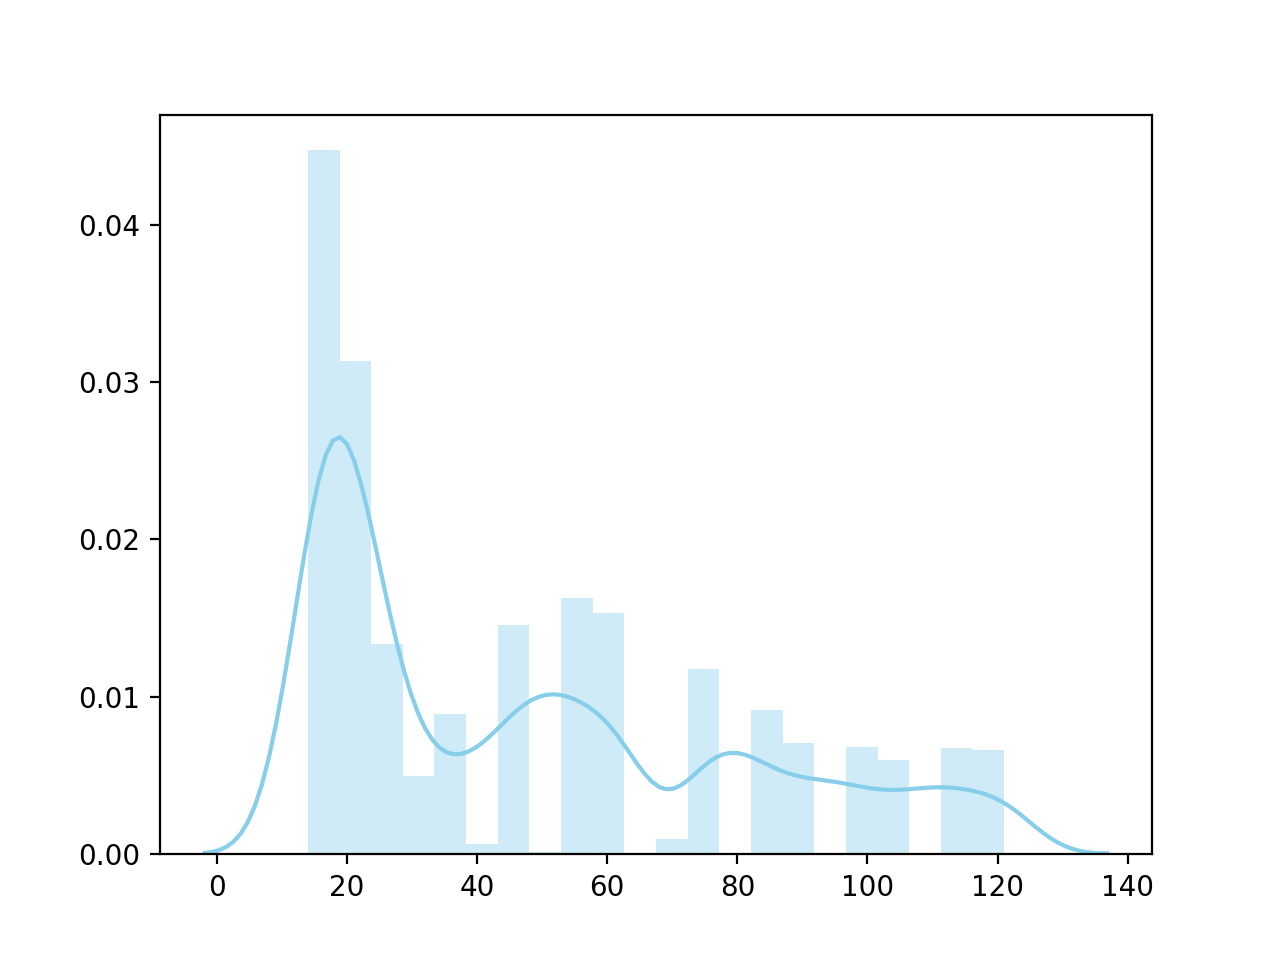

In [47]:
import librosa
import librosa.display
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

len_2b_0 = []
len_1b_0 = []
len_w_0 = []
len_1f_0 = []
len_2f_0 = []

len_2b_1 = []
len_1b_1 = []
len_w_1 = []
len_1f_1 = []
len_2f_1 = []
for index, rows in tqdm(df.iterrows(), total=df.shape[0]):
    if rows['filename'] == "f1":
        path = "./dataset/state of the union 2018/"
    else:
        path = "./dataset/state-of-the-union-trump_2019-02-05-225820-8225-0-0-0.64kmono/"
    try:
        name_2b= path+str(rows['Number_c_2b'])+'.mp3'
        x_2b, sr_2b = librosa.load(name_2b)
        spec_2b = librosa.amplitude_to_db(np.abs(librosa.stft(x_2b)), ref=np.max)
        if spec_2b.shape[1] < 20:
            spec_2b = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.effects.time_stretch(x_2b, 0.15))), ref=np.max)
        elif spec_2b.shape[1] > 20:
            spec_2b = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.effects.time_stretch(x_2b, 1.5))), ref=np.max)
        len_2b_0.append(spec_2b.shape[0])
        len_2b_1.append(spec_2b.shape[1])

        name_1b= path+str(rows['Number_c_1b'])+'.mp3'
        x_1b, sr_1b = librosa.load(name_1b)
        spec_1b = librosa.amplitude_to_db(np.abs(librosa.stft(x_1b)), ref=np.max)
        if spec_1b.shape[1] < 20:
            spec_1b = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.effects.time_stretch(x_1b, 0.15))), ref=np.max)
        elif spec_1b.shape[1] > 20:
            spec_1b = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.effects.time_stretch(x_1b, 1.5))), ref=np.max)
        len_1b_0.append(spec_1b.shape[0])
        len_1b_1.append(spec_1b.shape[1])

        name_w= path+str(rows['Number'])+'.mp3'
        x_w, sr_w = librosa.load(name_w)
        spec_w = librosa.amplitude_to_db(np.abs(librosa.stft(x_w)), ref=np.max)
        if spec_w.shape[1] < 20:
            spec_w = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.effects.time_stretch(x_w, 0.15))), ref=np.max)
        elif spec_w.shape[1] > 20:
            spec_w = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.effects.time_stretch(x_w, 1.5))), ref=np.max)
        len_w_0.append(spec_w.shape[0])
        len_w_1.append(spec_w.shape[1])

        name_2f= path+str(rows['Number_c_2f'])+'.mp3'
        x_2f, sr_2f = librosa.load(name_2f)
        spec_2f = librosa.amplitude_to_db(np.abs(librosa.stft(x_2f)), ref=np.max)
        if spec_2f.shape[1] < 20:
            spec_2f = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.effects.time_stretch(x_2f, 0.15))), ref=np.max)
        elif spec_2f.shape[1] > 20:
            spec_2f = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.effects.time_stretch(x_2f, 1.5))), ref=np.max)
        len_2f_0.append(spec_2f.shape[0])
        len_2f_1.append(spec_2f.shape[1])

        name_1f= path+str(rows['Number_c_1f'])+'.mp3'
        x_1f, sr_1f = librosa.load(name_1f)
        spec_1f = librosa.amplitude_to_db(np.abs(librosa.stft(x_1f)), ref=np.max)
        if spec_1f.shape[1] < 20:
            spec_1f = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.effects.time_stretch(x_1f, 0.15))), ref=np.max)
        elif spec_1f.shape[1] > 20:
            spec_1f = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.effects.time_stretch(x_1f, 1.5))), ref=np.max)
        len_1f_0.append(spec_1f.shape[0])
        len_1f_1.append(spec_1f.shape[1])
    except Exception:
        pass
np.save('train_.npy', num_arr)
np.save('data.npy', num_arr)
np.save('data.npy', num_arr)
sns.distplot( len_w_1 , color="skyblue")

In [22]:
# print(max(len_2b_1))
# print(max(len_1b_1))
# print(max(len_w_1))
# print(max(len_1f_1))
# print(max(len_2f_1))

# print(min(len_2b_1))
# print(min(len_1b_1))
# print(min(len_w_1))
# print(min(len_1f_1))
# print(min(len_2f_1))
mc = pd.read_csv("./dataset/wordsim353_sim_rel/verb.txt", sep="\t", )
mc.head()
# mc_SYNONYMS = mc[mc['type']=="SYNONYMS"]
l = df['Word'].tolist()
l_1=[]
l_2=[]
for index, rows in mc.iterrows():
    if rows['word1'] in l:
        print(rows['word1'])
        l_1.append(rows['word1'])
    if rows['word2'] in l:
        print(rows['word2'])
        l_2.append(rows['word2'])
print(len(l_2)+len(l_1))
print(mc.shape)

happen
make
rise
work
make
work
happening
happen
exists
happening
lead
happen
lead
13
(144, 13)
